In [420]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt

In [421]:

rates_frame = pd.read_csv("EURUSD.csv")


# prepare data for prophet
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

p = int(0.05*len(rates_frame))


df = pd.DataFrame()
df["ds"]     = rates_frame["time"]
df["y"]      = rates_frame["close"]

In [422]:
def predict_prices():

    # fit prophet model
    model = Prophet()

    model.fit(df)

    # predict future p closing prices
    future = model.make_future_dataframe(periods=p, freq='5min')

    forecast = model.predict(future)


    # plot predicted vs actual values
    model.plot(forecast)
    plt.show()

    return forecast

 


00:12:52 - cmdstanpy - INFO - Chain [1] start processing
00:13:08 - cmdstanpy - INFO - Chain [1] done processing


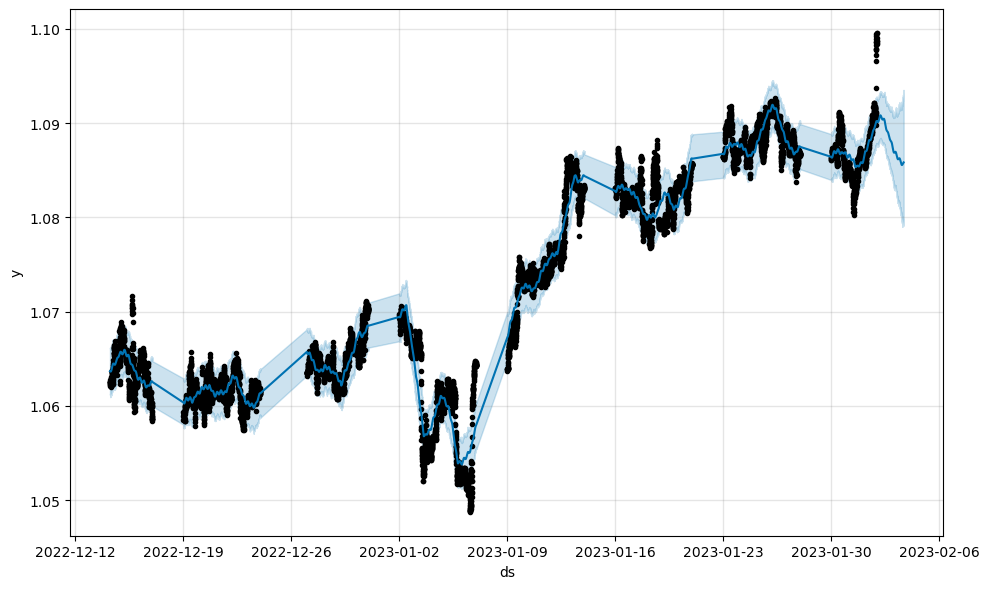

In [423]:
forecast            = predict_prices()

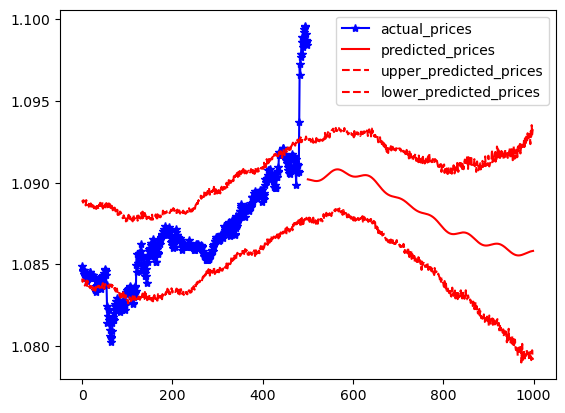

In [424]:
actual_prices          = list(rates_frame["close"].iloc[-p:])
predicted_prices       = forecast['yhat'][-p:].tolist()
upper_predicted_prices = forecast['yhat_upper'][-2*p:].tolist()
lower_predicted_prices = forecast['yhat_lower'][-2*p:].tolist()

x1 = range(len(actual_prices))
x2 = range(len(actual_prices), len(actual_prices) + len(predicted_prices))
x3 = range(len(actual_prices) + len(predicted_prices))

plt.plot(x1, actual_prices, 'b*-', label='actual_prices')
plt.plot(x2, predicted_prices, 'r-', label='predicted_prices')
plt.plot(x3, upper_predicted_prices, 'r--', label='upper_predicted_prices')
plt.plot(x3, lower_predicted_prices, 'r--', label='lower_predicted_prices')
plt.legend()
plt.show()